# Import thư viện

In [129]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

# Helper

In [130]:

def evaluate_cart_model(model, X_train, y_train, X_test, y_test, task='classification', plot_depth=3, path=None):
    """
    Huấn luyện, dự đoán, đánh giá, vẽ cây và lưu mô hình cho CART hoặc tương tự.

    Parameters
    ----------
    model : sklearn estimator
        Model đã chọn (DecisionTreeClassifier hoặc DecisionTreeRegressor)
    X_train, y_train : pandas.DataFrame/Series or numpy.array
        Dữ liệu huấn luyện
    X_test, y_test : pandas.DataFrame/Series or numpy.array
        Dữ liệu test
    task : str
        'classification' hoặc 'regression'
    plot_depth : int
        Số tầng muốn hiển thị trên cây khi plot
    path : str or None
        Đường dẫn để lưu mô hình (.joblib). Nếu None, không lưu.
    """
    # Huấn luyện
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Đánh giá
    if task == 'classification':
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        n_correct = np.sum(y_pred == y_test)
        n_total = len(y_test)
        
        print(f"Classification Results")
        print(f"Số mẫu dự đoán đúng: {n_correct}/{n_total} ({acc*100:.2f}%)")
        print("\nConfusion Matrix:\n", cm)
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        
        # Vẽ cây
        plt.figure(figsize=(20,10))
        plot_tree(model, filled=True, feature_names=X_train.columns,
                  class_names=[str(c) for c in np.unique(y_train)], max_depth=plot_depth, fontsize=14)
        plt.title("Decision Tree (Classification)")
        plt.show()
        
    elif task == 'regression':
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Regression Results")
        print("R² score:", r2)
        print("MAE:", mae)
        print("RMSE:", rmse)
        
        # Vẽ cây
        plt.figure(figsize=(20,10))
        plot_tree(model, filled=True, feature_names=X_train.columns, max_depth=plot_depth, fontsize=14)
        plt.title("Decision Tree (Regression)")
        plt.show()
        
    else:
        raise ValueError("task must be either 'classification' or 'regression'")
    
    # Lưu model nếu có path
    if path is not None:
        model_path=f"../models/{path}"
        joblib.dump(model, model_path)
        print(f"\nModel saved to: {model_path}")
    
    return model, y_pred


# Import Data

### Bank Marketing

In [131]:
bank_marketing_path = "../data/resolved_data/bank-additional-full.csv"
df_bank_marketing = pd.read_csv(bank_marketing_path, sep=';')

In [132]:
X_bank_marketing = df_bank_marketing.drop(columns=['y'])
y_bank_marketing = df_bank_marketing['y']

X_bank_marketing_train, X_bank_marketing_test, y_bank_marketing_train, y_bank_marketing_test = train_test_split(
    X_bank_marketing, y_bank_marketing, test_size=0.2, random_state=42, stratify=y_bank_marketing
)
print("Train:", X_bank_marketing_train.shape, " Test:", X_bank_marketing_test.shape)

Train: (32950, 19)  Test: (8238, 19)


In [133]:
print("Tỷ lệ lớp (train):")
print(y_bank_marketing_train.value_counts(normalize=True))

print("\n========================================\n")

print("Tỷ lệ lớp (test):")
print(y_bank_marketing_test.value_counts(normalize=True))

Tỷ lệ lớp (train):
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64


Tỷ lệ lớp (test):
y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


# Classifications

### Bank Marketing

Classification Results
Số mẫu dự đoán đúng: 6836/8238 (82.98%)

Confusion Matrix:
 [[6214 1096]
 [ 306  622]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.36      0.67      0.47       928

    accuracy                           0.83      8238
   macro avg       0.66      0.76      0.68      8238
weighted avg       0.89      0.83      0.85      8238



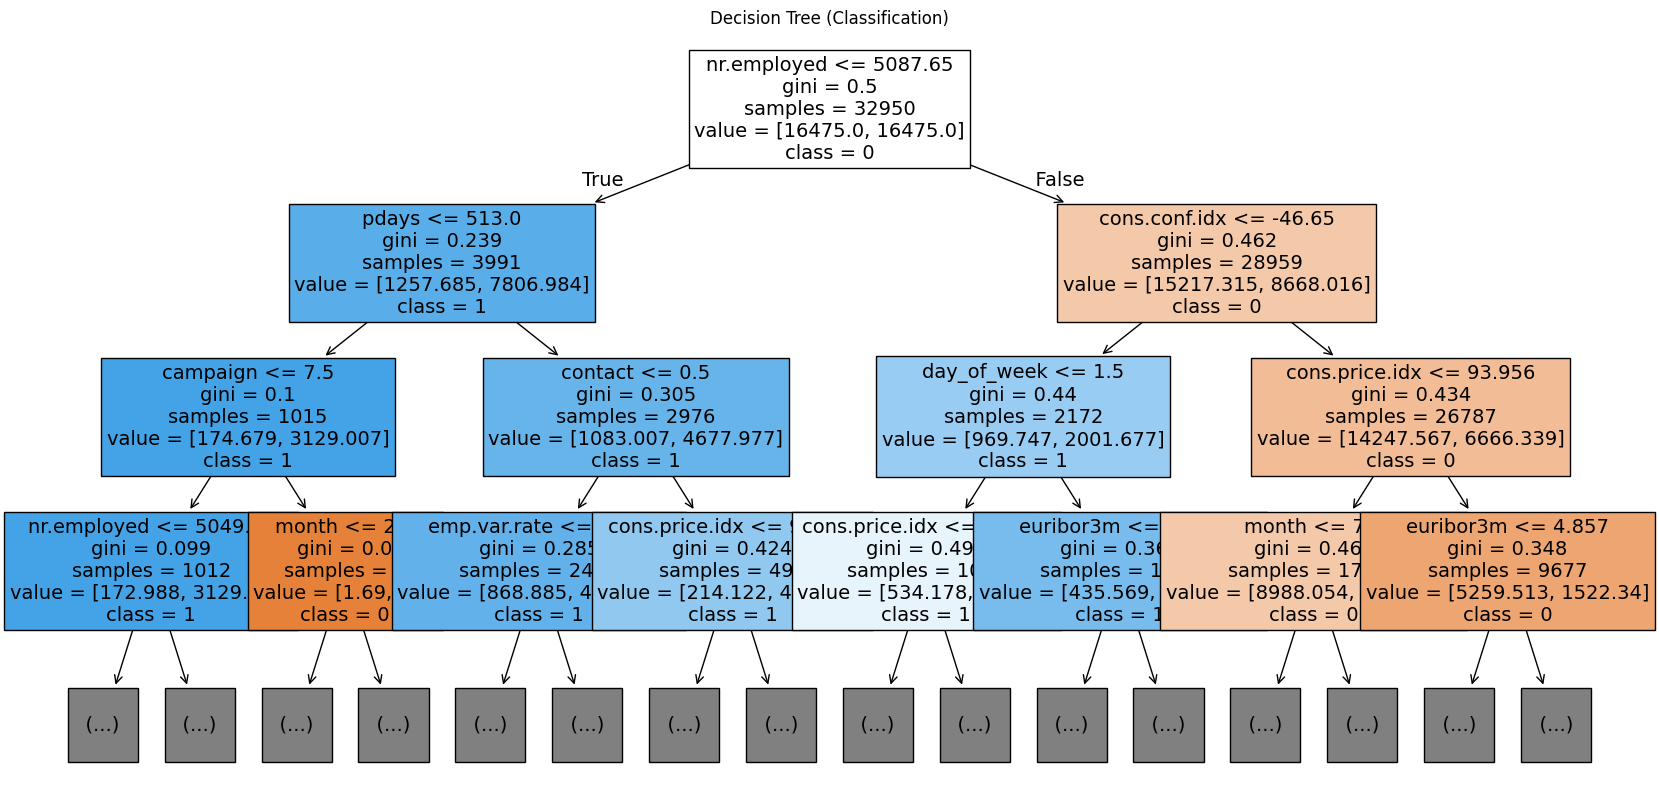


Model saved to: ../models/bank_marketing/cart_bank_marketing_model.joblib


In [134]:
cart_clf = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=42)

model, y_pred = evaluate_cart_model(
    model=cart_clf,
    X_train=X_bank_marketing_train,
    y_train=y_bank_marketing_train,
    X_test=X_bank_marketing_test,
    y_test=y_bank_marketing_test,
    task='classification',
    plot_depth=3,
    path='bank_marketing/cart_bank_marketing_model.joblib'  # lưu model vào file
)

# Regression

### Bank Marketing

Regression Results
R² score: 0.24173833002843126
MAE: 0.15089858145050788
RMSE: 0.2753090199858417


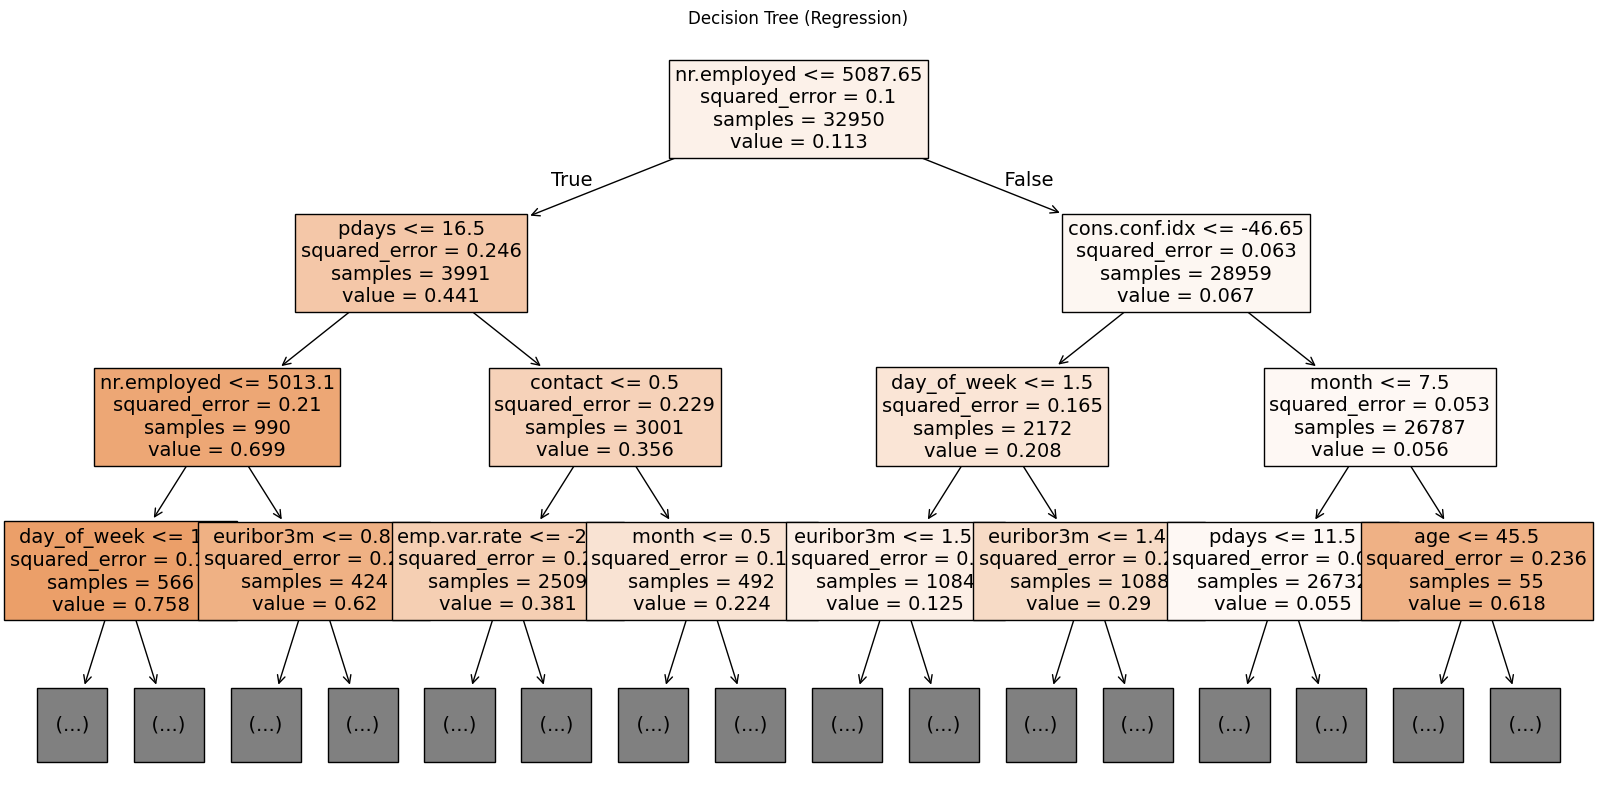


Model saved to: ../models/bank_marketing/cart_bank_marketing_model_rgs.joblib


In [135]:
cart_rgs = DecisionTreeRegressor(max_depth=6, random_state=42)

model, y_pred_bank_marketing_rgs = evaluate_cart_model(
    model=cart_rgs,
    X_train=X_bank_marketing_train,
    y_train=y_bank_marketing_train,
    X_test=X_bank_marketing_test,
    y_test=y_bank_marketing_test,
    task='regression',
    plot_depth=3,
    path='bank_marketing/cart_bank_marketing_model_rgs.joblib'  # lưu model vào file
)

In [136]:
print(y_pred_bank_marketing_rgs)
y_pred_binary_bank_marketing_rgs = (y_pred_bank_marketing_rgs >= 0.5).astype(int)

[0.06075912 0.2955665  0.61785714 ... 0.38075314 0.03041418 0.06075912]


In [137]:
# Tính số lượng dự đoán đúng
n_bank_marketing_correct = np.sum(y_pred_binary_bank_marketing_rgs == y_bank_marketing_test)
n_bank_marketing_total = len(y_bank_marketing_test)
accuracy_bank_marketing = n_bank_marketing_correct / n_bank_marketing_total

print(f"\n✅ Số mẫu dự đoán đúng: {n_bank_marketing_correct}/{n_bank_marketing_total} ({accuracy_bank_marketing*100:.2f}%)")


✅ Số mẫu dự đoán đúng: 7432/8238 (90.22%)
